In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
from tkinter import *

### Requesting the data from the univ. website


In [2]:
url = "https://www.srmist.edu.in/department-of-information-technology/faculty"
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

In [3]:
soup = BeautifulSoup(html_content, "lxml")

In [4]:
my_table = soup.find("table", attrs={"class": "table table-striped hostel-fee"})
my_table_data = my_table.tbody.find_all("tr")

In [5]:
from bs4 import BeautifulSoup
name_data =[]
research_data=[]
name_interest ={}
for tr in my_table.tbody.find_all("tr"): # find all tr's from table's tbody
    if(tr.a==None):
        pass
#         name_data.append(headings[0])
#         research_data.append(headings[2])
    else:
        name_data.append(tr.a.text)
        t1=tr.text.replace('\n', '')
        t2=t1.split('\t') 
        research_data.append(t2[-1])
        name_interest[tr.a.text] = (t2[-1]).strip().split(',')

### The display of all faculties and their feild of interest

In [71]:
name_interest
name = []
interest =[]
for key ,value in name_interest.items():
    for v in value:
        name.append(key)
        interest.append(v.lower().strip())
        
df = pd.DataFrame(list(zip(name, interest)),
               columns =['Name', 'field'])
df.dropna() 
df

,Name,field
0,Dr.G.Vadivu,big data analytics
1,Dr.G.Vadivu,semantic web
2,Dr.G.Vadivu,data mining
3,Dr.G.Vadivu,database systems
4,Dr.S.Suresh,internet of things
...,...,...
131,Mr.S.Deepan,internet of things (iot)
132,Ms.R.Mythili,networking
133,Ms.G.Renuka Devi,cloud computing
134,Ms.G.Renuka Devi,information security


### Network of faculties along with their feilds

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

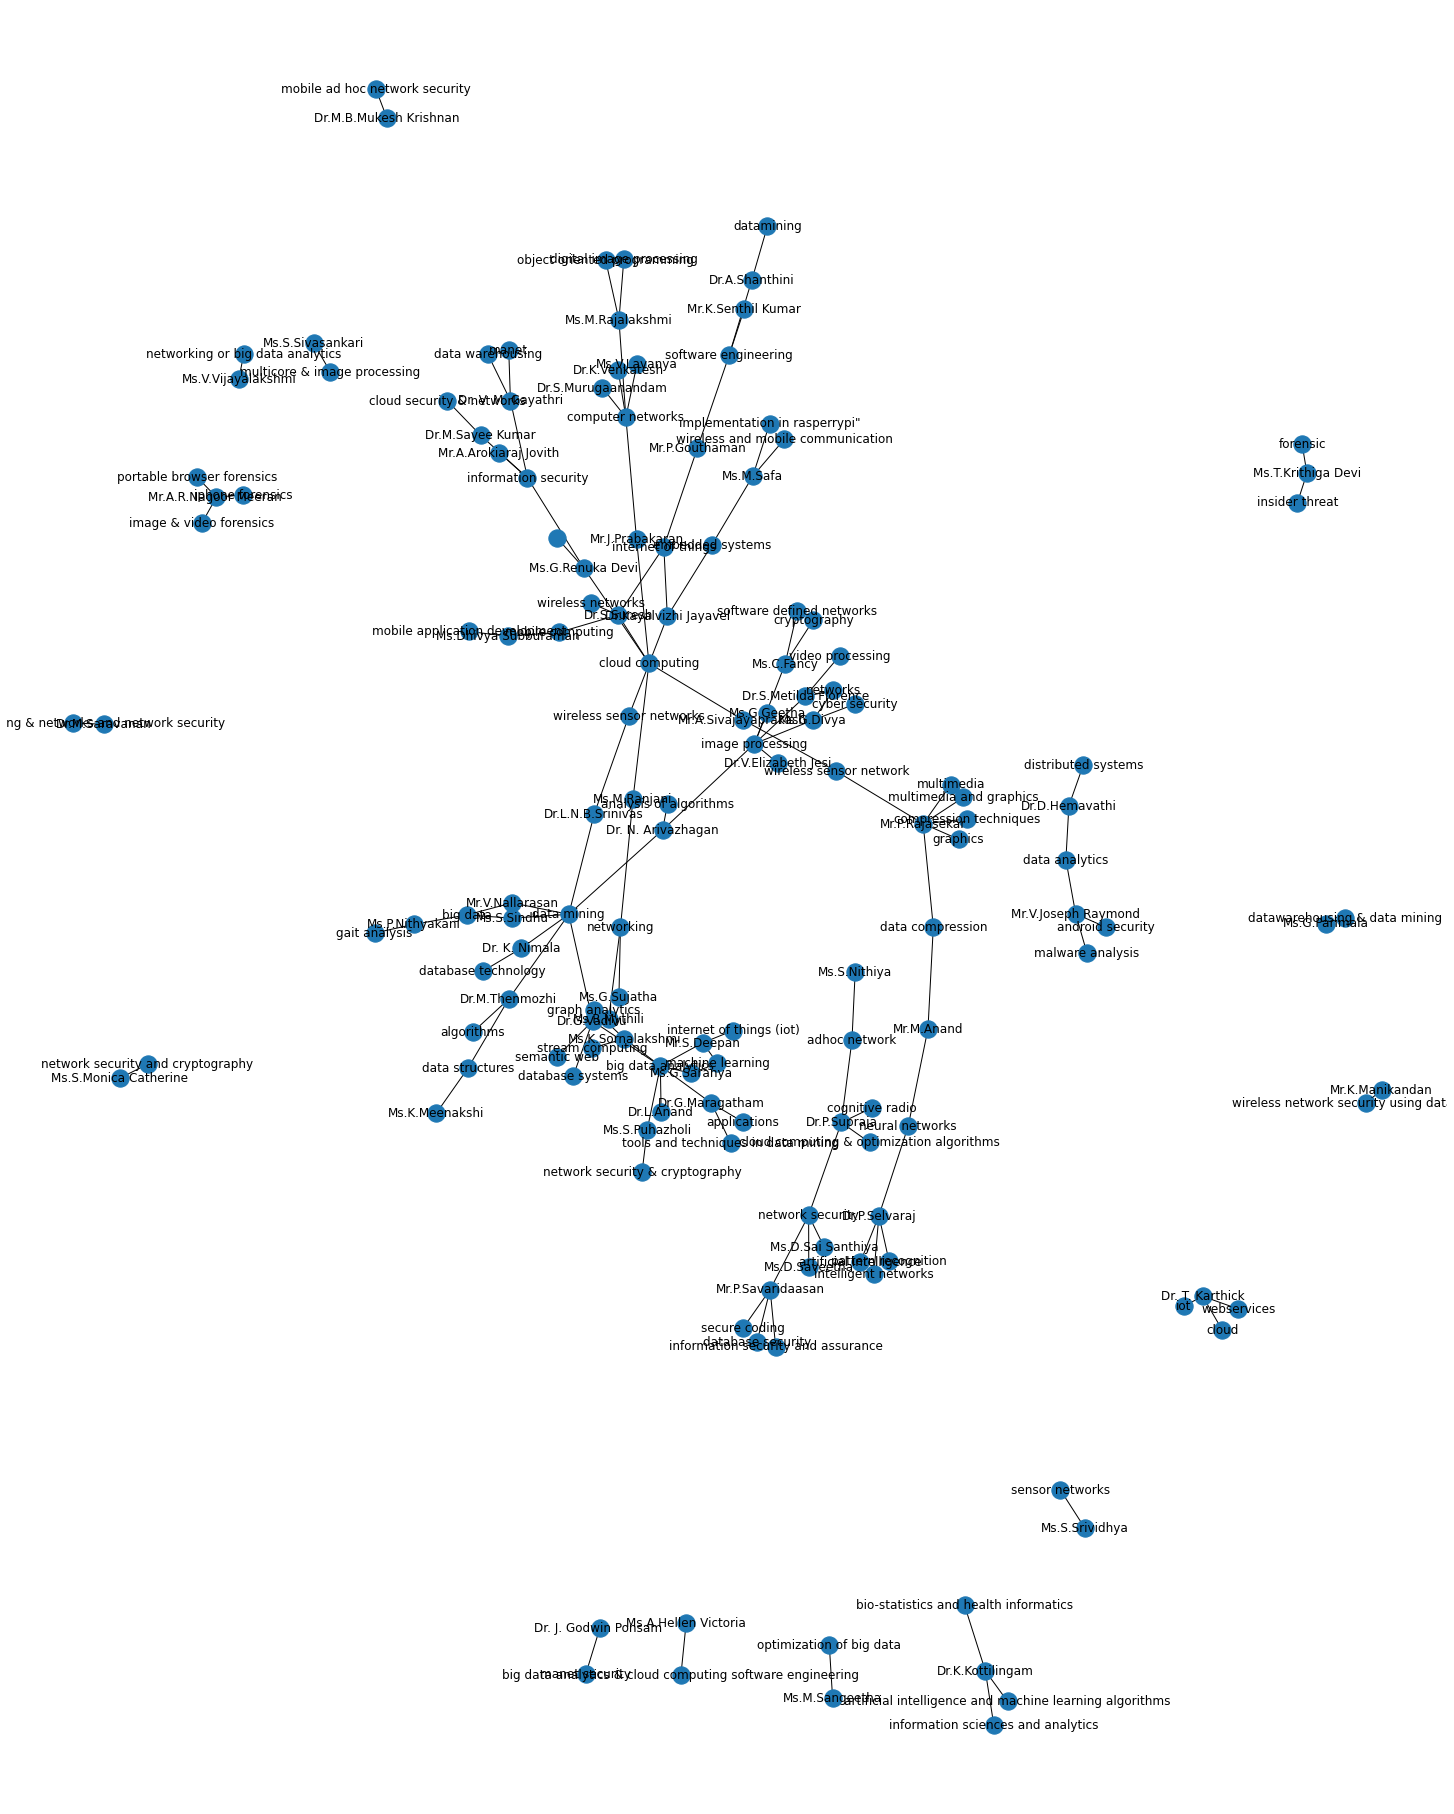

In [73]:
G = nx.from_pandas_edgelist(df, 'Name', 'field')

plt.figure(figsize=(20, 25))
nx.draw(G, with_labels=True)

### Selection by faculty name and their feild of interest

Please select the option in the pop up window and click select and close the window and continue the execution

In [90]:
root = Tk()
  
root.geometry( "200x200" )
  
# Change the label text
def show():
    label.config( text = clicked.get() )
  
#Dropdown menu options
options = set(name)
  
# datatype of menu text
clicked = StringVar()
  
# initial menu text
clicked.set( name[0] )
  
# Create Dropdown menu
drop = OptionMenu( root , clicked , *options )
drop.pack()
  
# Create button, it will change label text
button = Button( root , text = "select" , command = show ).pack()
  
# Create Label
label = Label( root , text = " " )
label.pack()

# Execute tkinter
root.mainloop()

In [91]:
N = [n for n in G.neighbors(clicked.get())]

In [92]:
g = nx.Graph()

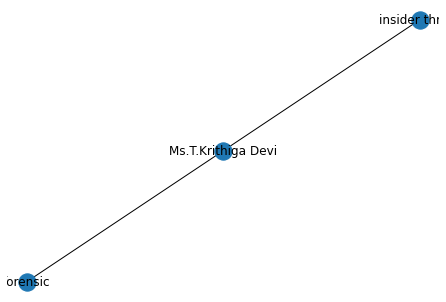

In [93]:
for i in N:
    g.add_edge(clicked.get(),i)
nx.draw(g, with_labels=True)

In [94]:
print('\033[1m' + clicked.get() + '\033[0m')
print('\n')
print('\033[1m' +'Feild of interests are:'+ '\033[0m')
for u in N:
    print('*',u.strip())
print('\n')

Ms.T.Krithiga Devi


Feild of interests are:
* insider threat
* forensic




### selection of faculties by area of interest

In [87]:
root = Tk()
  
root.geometry( "400x400" )
  
# Change the label text
def show():
    label.config( text = clicked.get() )
  
# Dropdown menu options
options = set(interest)
clicked = StringVar()
clicked.set( interest[3] )
  
# Create Dropdown menu
drop = OptionMenu( root , clicked , *options )
drop.pack()
  
# Create button, it will change label text
button = Button( root , text = "select" , command = show ).pack()
  
# Create Label
label = Label( root , text = " " )
label.pack()

# Execute tkinter
root.mainloop()

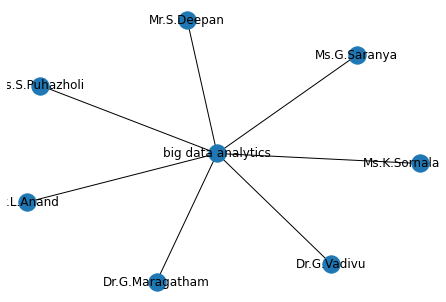

In [88]:
N = [n for n in G.neighbors(clicked.get())]
g = nx.Graph()
for i in N:
    g.add_edge(clicked.get(),i)
nx.draw(g, with_labels=True)

In [89]:
print('\033[1m' + clicked.get() + '\033[0m')
print('\n')
print('\033[1m' +'Faculties are:'+ '\033[0m')
for u in N:
    print('*',u.strip())
print('\n')

big data analytics


Faculties are:
* Dr.G.Vadivu
* Dr.G.Maragatham
* Ms.K.Sornalakshmi
* Ms.G.Saranya
* Dr.L.Anand
* Ms.S.Puhazholi
* Mr.S.Deepan


